<a href="https://colab.research.google.com/github/raj-vijay/mo/blob/master/01_Traveling_Salesman_Problem_Approach_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Metaheuristic Optimization </h1>

<h2>Traveling Salesman Problem (TSP) </h2>

<p align = 'justify'> <b>TravelingSalesmanProblem</b> </p> 

<p align = 'justify'>The Traveling Salesman Problem (TSP) asks the following question: “Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?”. 

It is an NP-hard problem with important practical and theoretical questions in computer science. The input is a complete graph with weighted edges. 

For brevity each vertex v ∈V is given an x-coordinate x(v) and y-coordinate y(v). The weight of the edge between vertex u and vertex v is defined by, 

<b>w(u, v) = nint( sqrt( (x(u) -x(v))^2 + (y(u) -y(v))^2))</b>

Where nint is a function that rounds a number to the nearest integer. The objective is to find the shortest cycle in the graph where each node is visited exactly once. TSP has obvious applications in route planning and other logistics scenarios, but also in wire routing for printed circuit boards, genome analysis, and many other domains. Because it is easy to explain but computationally challenging, it is often used as a test bed for new algorithms to solve combinatorial problems. </p>

Here, we implement a meta-heuristic solution for the Traveling Salesman Problem using Nearest Neighbour insertion.

- Start with randomly selected city and insert each new city into the current tour after the city to which it is closest.
- If there is more than one city to which it is closet, insert it after the first such city you encounter.

The below python program solves a given instance of the traveling salesman problem and implements the Nearest Neighbor Insertion heuristic.

<p align = 'justify'><b>Heuristic method

Nearest-Neighbor:</b> Choose city at random for start and then repeatedly choose city at random and insert it beside nearest city already on route, until all cities are done. Alternatively, it is also possible to choose city at random for start and then repeatedly choose the nearest city to the last chosen city as next city until all cities are on route.</p>

Import necessary modules

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

Define basic functions

In [ ]:
def load_data(f):
    count = np.loadtxt(f, delimiter=' ', max_rows=1)
    cities = np.loadtxt(f, delimiter=' ', dtype={'names': ('id', 'x', 'y'), 'formats': ('int', 'float', 'float')}, skiprows=1)
    return count, cities

In [ ]:
def visit_cities(count, cities):
    idx = int(random.randint(1, count))
    not_visited = cities[cities['id'] != idx]['id'].tolist()
    tsp_list = [idx]
    tsp_cost = 0
    
    for id in not_visited:
        c = cities[cities['id'] == id]
        visited_cities = cities[np.isin(cities['id'], tsp_list)]
        distance = np.array([visited_cities['id'], np.around(np.sqrt(np.power(visited_cities['x'] - c['x'], 2) + np.power(visited_cities['y'] - c['y'], 2)))
        ])
        nn = int(distance[0][distance[1].argmin()])
        tsp_list.insert(tsp_list.index(nn) + 1, id)
        tsp_cost += distance[1].min()

    start = tsp_list[0]
    tsp_list.append(start)
    final_dist = np.around(np.sqrt(np.power(cities[cities['id'] == start]['x'] - cities[cities['id'] == idx]['x'], 2) + np.power(cities[cities['id'] == start]['y'] - cities[cities['id'] == idx]['y'], 2)))
    tsp_cost += final_dist
    
    return tsp_list, int(tsp_cost)

In [ ]:
def add_cities(count, cities):
    idx = int(random.randint(1, count))
    not_visited = cities[cities['id'] != idx]['id'].tolist()
    tsp_arr = np.array([[idx, 0]])

    while not_visited:
        cur_x = cities[cities['id'] == idx]['x']
        cur_y = cities[cities['id'] == idx]['y']
        remaining_cities = cities[np.isin(cities['id'], not_visited)]
        distance = np.array([remaining_cities['id'], np.around(np.sqrt(np.power(remaining_cities['x'] - cur_x, 2) + np.power(remaining_cities['y'] - cur_y, 2)))])
        tsp_arr = np.append(tsp_arr, np.array([[distance[0][distance[1].argmin()], distance[1].min()]]), axis=0)
        not_visited.remove(distance[0][distance[1].argmin()])
        idx = int(distance[0][distance[1].argmin()])

    start = tsp_arr[0][0]
    final_dist = np.around(np.sqrt(np.power(cities[cities['id'] == start]['x'] - cities[cities['id'] == idx]['x'], 2) + np.power(cities[cities['id'] == start]['y'] - cities[cities['id'] == idx]['y'], 2)))
    tsp_arr = np.append(tsp_arr, np.array([[start, final_dist]]), axis=0)
    
    return tsp_arr[:, 0].astype(int), tsp_arr[:, 1].sum().astype(int)

In [ ]:
def print_solution(cost, path=None):
    print('Cost: {}'.format(cost))
    if path: print('Path: {}'.format(path))

In [ ]:
def write_output(f, cost, path):
    with open(f, "wb") as f:
        np.savetxt(f, cost, fmt='%i')
        np.savetxt(f, path, fmt='%i')

In [ ]:
def path(path, cities):
    fig, ax = plt.subplots(figsize=(20, 20))

    x = []
    y = []

    for i in path:
        i = int(i) - 1
        x.append(cities[i]['x'])
        y.append(cities[i]['y'])

    
    plt.plot(x, y, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=2)
    plt.plot(x[0], y[0], 'ro')
    plt.show()

Execute Traveling Salesman Problem for different instances

In [ ]:
file1 = '/content/drive/My Drive/000.Data/TSPData/inst-0.tsp'

In [ ]:
count1, cities1 = load_data(file1)

Heuristic Solution : Unassigned city assigned next to the last inserted city

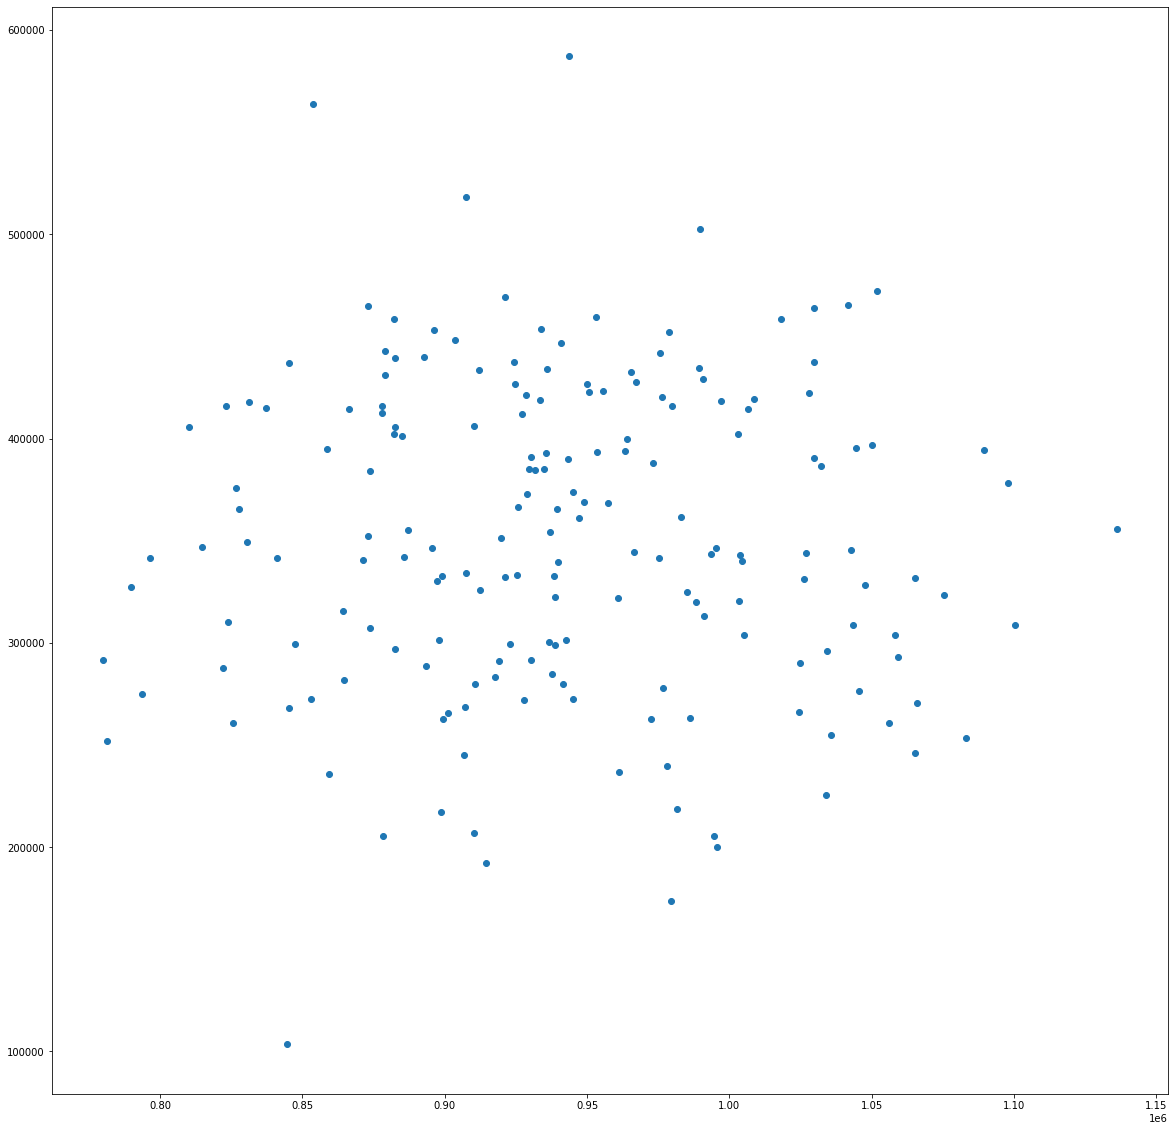

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.scatter(cities1['x'], cities1['y'])

Cost: [4357270]


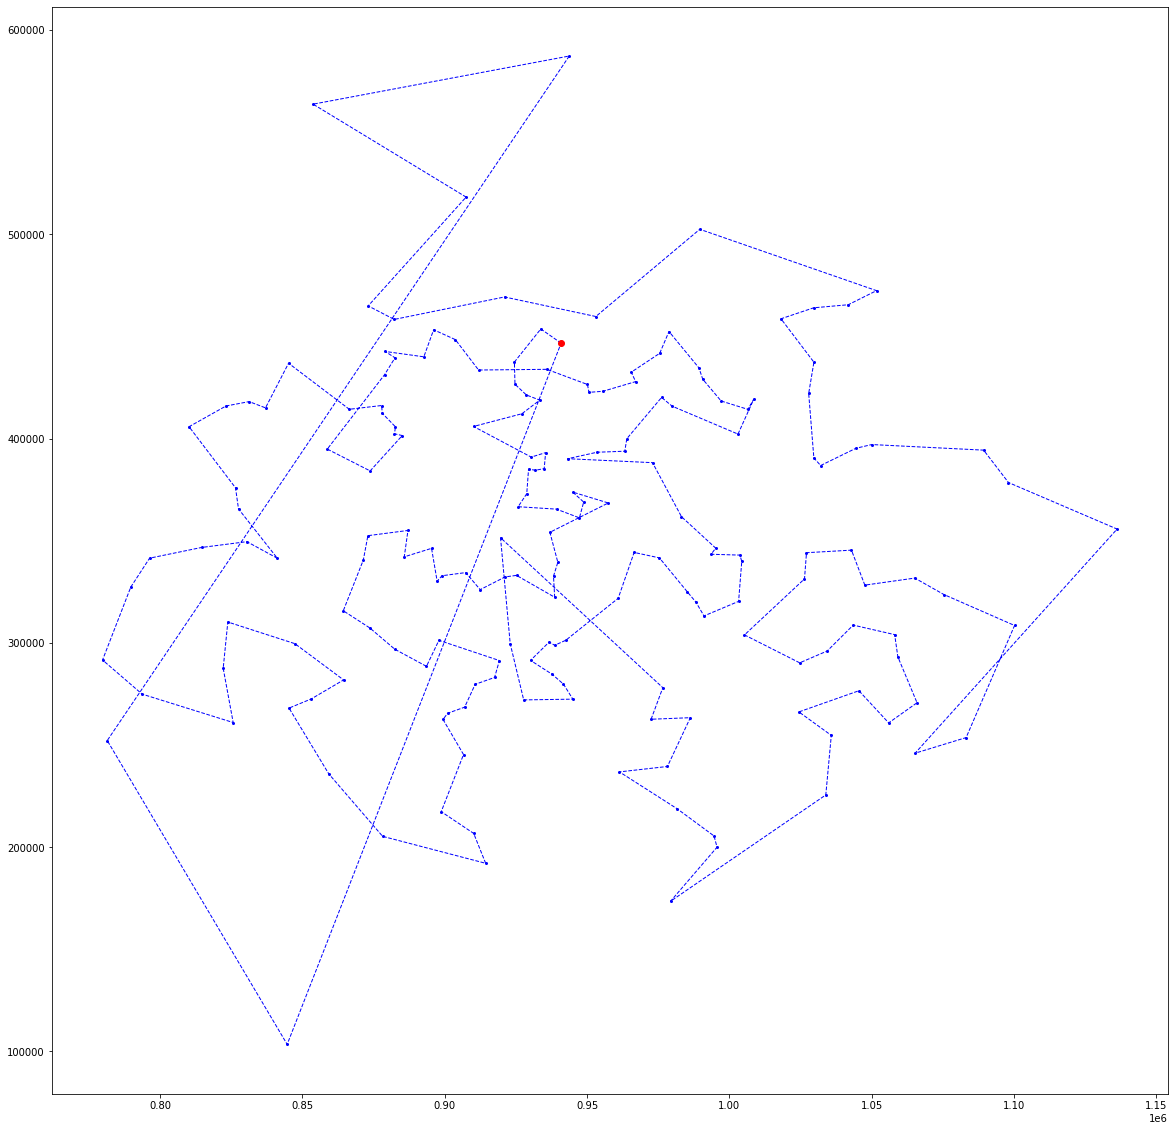

In [ ]:
path1, cost1 = add_cities(count1, cities1)
print_solution(cost1)
path(path1, cities1)

In [ ]:
print("Cost :", cost1)
print("Path :", path1)

Cost : [4365992]
Path : [ 78   7  18 182 162 120  12  58 102 133  87 154  11 184  85 152 121  35
 151 135  60  69 111 122 108  29 103 181  20  47  15 110  43  75 105 160
  24  36  88  31  34 164  59   6 112  52 126 156 106 159  63 131 117  81
  61  39   2  68  38 145  42  79 127 116  98  56   1 138 132 114 125  90
  46  27 153 104 115 139   4 158  91  10  86  30  48  21 178 136  32  25
   5  96 169 142  17 148  53  71 141 177  95 119  49 129  80 150 130  51
  99 113 134  33 118  72 173 170 109 179  45 163  65  82  73  19  92 101
  41 149  50  54 107  74 171 174  67 124 147  26  89  40  66  62  70  83
  44   9  76  94  97 183  64  55   3 100  37  93  23 143  84  16 166  77
 167 161 140 123  14  28 137 157 180 146  57  22 128  13 175 144 172   8
 155 168 165 176  78]


Heuristic Solution : Unassigned city assigned next to the city with shortest distance

Cost: 4250193


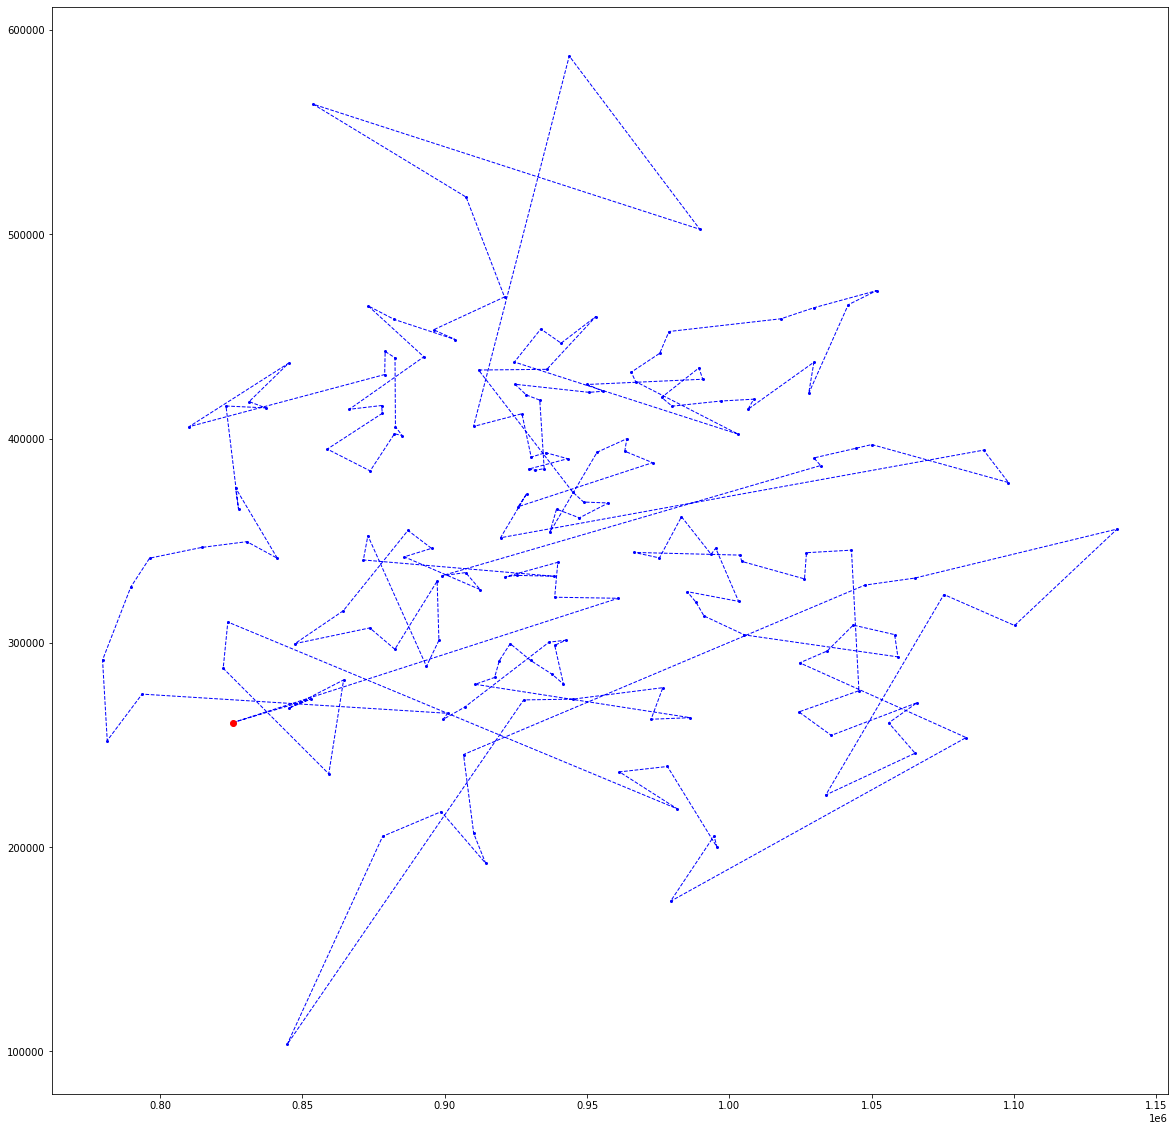

In [ ]:
path1, cost1 = visit_cities(count1, cities1)
print_solution(cost1)
path(path1, cities1)